In [1]:
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
from theano import tensor as tt
%matplotlib inline

In [2]:
def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])

    return beta * portion_remaining

In [3]:
K = 5 # Number of categories at which we truncate the dirichlet process
N = 10

In [4]:
samp_graph_t = np.concatenate([np.ones([3,3]),np.zeros([3,7])],axis=1)
samp_graph_b = np.concatenate([np.zeros([7,3]),np.ones([7,7])],axis=1)

samp_graph = np.concatenate([samp_graph_t,samp_graph_b])
samp_graph

array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [81]:
with pm.Model() as irm_model:
    gamma_ = pm.Gamma('gamma', 1., 1.)
    betas_crp = pm.Beta('betas_crp', 1., gamma_, shape=K)
    w = pm.Deterministic('w',stick_breaking(betas_crp))
    
    beta_ = pm.Gamma('beta_', 1., 1.)
    eta_ = pm.Beta('eta_',beta_,beta_, shape=[K,K])
    
    cat = tt.stack([pm.Multinomial('cat'+str(i),n=1,p=w, shape=K) for i in range(N)])
    
    link_prob = pm.math.dot(pm.math.dot(cat,eta_),tt.transpose(cat))
    R = pm.Bernoulli('R', p=link_prob, shape = [N,N],observed = samp_graph)

#     tau = pm.Gamma('tau', 1., 1., shape=K)
#     lambda_ = pm.Uniform('lambda', 0, 5, shape=K)
#     mu = pm.Normal('mu', 0, tau=lambda_ * tau, shape=K)
#     obs = pm.NormalMixture('obs', w, mu, tau=lambda_ * tau,
#                            observed=old_faithful_df.std_waiting.values)

In [86]:
with pm.Model() as irm_model:
    gamma_ = pm.Gamma('gamma', 1., 1.)
    betas_crp = pm.Beta('betas_crp', 1., gamma_, shape=K)
    w = pm.Deterministic('w',stick_breaking(betas_crp))
    
    beta_ = pm.Gamma('beta_', 1., 1.)
    eta_ = pm.Beta('eta_',beta_,beta_, shape=[K,K])
    
    cat_x = pm.Categorical('cat_x',p=w,shape=N)
    cat_y = pm.Categorical('cat_y',p=w,shape=N)
    
    link_prob = eta_[cat_x,cat_y]
    R = pm.Bernoulli('R', p=link_prob,observed = samp_graph)

In [90]:
pm.Dirichlet?

In [ ]:
with pm.Model() as irm_model:
    w = pm.Dirichlet('w',a=np.array([1,1]))
    
    beta_ = pm.Gamma('beta_', 1., 1.)
    eta_ = pm.Beta('eta_',beta_,beta_, shape=[2,2])
    
    cat = tt.stack([pm.Multinomial('cat'+str(i),n=1,p=w, shape=2) for i in range(N)])
    
    link_prob = pm.math.dot(pm.math.dot(cat,eta_),tt.transpose(cat))
    R = pm.Bernoulli('R', p=link_prob, shape = [N,N],observed = samp_graph)

In [1]:
with irm_model:
    map_est = pm.find_MAP()

NameError: name 'irm_model' is not defined

In [88]:
print(map_est)

{'gamma_log_': array(0.41175826579959196), 'cat_x': array(0), 'cat_y': array(0), 'beta__log_': array(2.6037956948676606), 'betas_crp_logodds_': array([ 0.6179982 , -0.48061389, -0.48061389, -0.48061389, -0.48061389]), 'eta__logodds_': array([[ 0.25325419,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])}


In [63]:
print(map_est)

print('\n')
print(1./(1+np.exp(-map_est['betas_crp_logodds_'])))

for i in range(10):
    print('cat'+str(i)+': '+str(map_est['cat'+str(i)]))

{'gamma_log_': array(1.1780614281115998), 'cat1': array([1, 0, 0, 0, 0]), 'beta__log_': array(2.6037956952089454), 'cat0': array([1, 0, 0, 0, 0]), 'betas_crp_logodds_': array([ 3.52241881,  3.42710871,  3.42710871,  3.42710871,  3.42710871]), 'cat2': array([1, 0, 0, 0, 0]), 'cat3': array([1, 0, 0, 0, 0]), 'cat4': array([1, 0, 0, 0, 0]), 'cat5': array([1, 0, 0, 0, 0]), 'cat6': array([1, 0, 0, 0, 0]), 'cat7': array([1, 0, 0, 0, 0]), 'cat8': array([1, 0, 0, 0, 0]), 'cat9': array([1, 0, 0, 0, 0]), 'eta__logodds_': array([[ 0.25325421,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])}


[ 0.97131897  0.96854109  0.96854109  0.96854109  0.96854109]
cat0: [1 0 0 0 0]
cat1: [1 0 0 0 0]
cat2: [1 0 0

In [30]:
with irm_model:
    trace = pm.sample(2000, n_init=50000)

Assigned NUTS to gamma_log_
Assigned NUTS to betas_crp_logodds_
Assigned NUTS to beta__log_
Assigned NUTS to eta__logodds_
Assigned Metropolis to cat0
Assigned Metropolis to cat1
Assigned Metropolis to cat2
Assigned Metropolis to cat3
Assigned Metropolis to cat4
Assigned Metropolis to cat5
Assigned Metropolis to cat6
Assigned Metropolis to cat7
Assigned Metropolis to cat8
Assigned Metropolis to cat9


KeyboardInterrupt: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11574da90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c83b050>]], dtype=object)

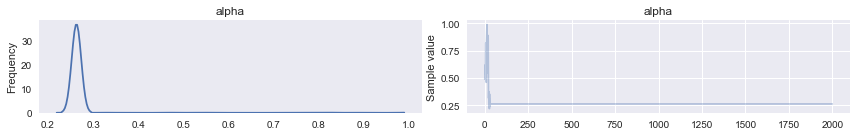

In [17]:
pm.traceplot(trace, varnames=['alpha'])

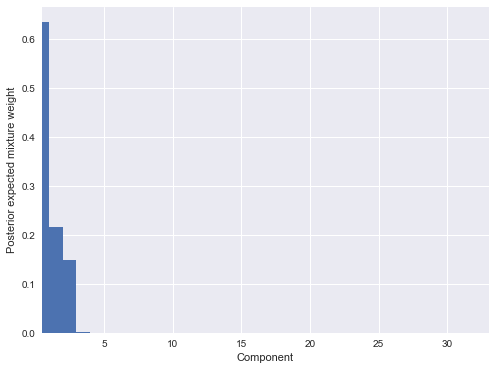

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_w = np.arange(K) + 1

ax.bar(plot_w - 0.5, trace['w'].mean(axis=0), width=1., lw=0);

ax.set_xlim(0.5, K);
ax.set_xlabel('Component');

ax.set_ylabel('Posterior expected mixture weight');

In [19]:

x_plot = np.linspace(-3, 3, 200)
post_pdf_contribs = sp.stats.norm.pdf(np.atleast_3d(x_plot),
                                      trace['mu'][:, np.newaxis, :],
                                      1. / np.sqrt(trace['lambda'] * trace['tau'])[:, np.newaxis, :])
post_pdfs = (trace['w'][:, np.newaxis, :] * post_pdf_contribs).sum(axis=-1)

post_pdf_low, post_pdf_high = np.percentile(post_pdfs, [2.5, 97.5], axis=0)

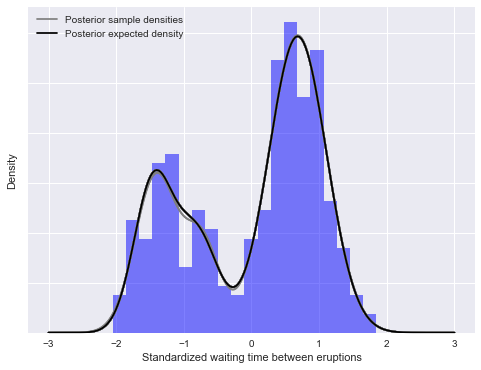

In [20]:

fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting.values, bins=n_bins, normed=True,
        color='blue', lw=0, alpha=0.5);

ax.fill_between(x_plot, post_pdf_low, post_pdf_high,
                color='gray', alpha=0.45);
ax.plot(x_plot, post_pdfs[0],
        c='gray', label='Posterior sample densities');
ax.plot(x_plot, post_pdfs[::100].T, c='gray');
ax.plot(x_plot, post_pdfs.mean(axis=0),
        c='k', label='Posterior expected density');

ax.set_xlabel('Standardized waiting time between eruptions');

ax.set_yticklabels([]);
ax.set_ylabel('Density');

ax.legend(loc=2);

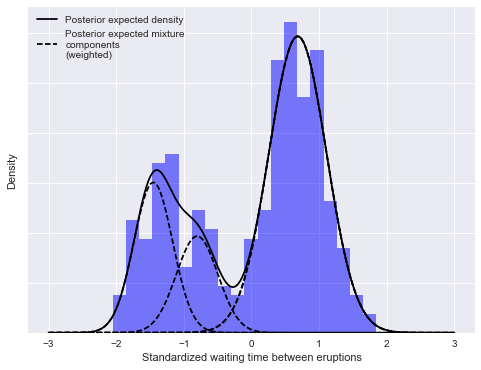

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting.values, bins=n_bins, normed=True,
        color='blue', lw=0, alpha=0.5);

ax.plot(x_plot, post_pdfs.mean(axis=0),
        c='k', label='Posterior expected density');
ax.plot(x_plot, (trace['w'][:, np.newaxis, :] * post_pdf_contribs).mean(axis=0)[:, 0],
        '--', c='k', label='Posterior expected mixture\ncomponents\n(weighted)');
ax.plot(x_plot, (trace['w'][:, np.newaxis, :] * post_pdf_contribs).mean(axis=0),
        '--', c='k');

ax.set_xlabel('Standardized waiting time between eruptions');

ax.set_yticklabels([]);
ax.set_ylabel('Density');

ax.legend(loc=2);


In [64]:
test_data = np.array([1,1,1,0,0,1,2,2,2,1])

In [83]:
with pm.Model() as crp_model:
    gamma_ = pm.Gamma('gamma', 1., 1.)
    betas_crp = pm.Beta('betas_crp', 1., gamma_, shape=K)
    w = pm.Deterministic('w',stick_breaking(betas_crp))
    
    obs = pm.Categorical('obs',p=w,observed = np.tile(test_data,(10,1)))

In [84]:
map_est = pm.find_MAP(model=crp_model)

Optimization terminated successfully.
         Current function value: 114.116956
         Iterations: 16
         Function evaluations: 19
         Gradient evaluations: 19


In [85]:
print(map_est)

{'betas_crp_logodds_': array([-1.35393934,  0.48738654,  3.15202947, -0.2819568 , -0.2819568 ]), 'gamma_log_': array(-0.08219332864350004)}


In [80]:
np.tile(samp_graph,(2,1,1))

array([[[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,